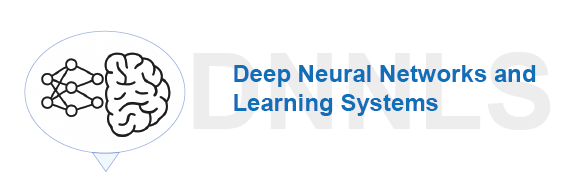

# Final Assessment Notebook — StoryReasoning Grounded Toy Storyteller
---

This notebook runs the complete assessment pipeline using the modular repo code:

- Loads config from `config.yaml`
- Loads StoryReasoning dataset
- Loads checkpoints from `models/`
- Evaluates qualitatively + with simple metrics
- Produces figures/tables in `results/`

In [10]:
# @title Mount Drive

from google.colab import drive
drive.mount("/content/gdrive")

# drive.flush_and_unmount()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
# @title Clone the repository (if you haven't already)

import os

# Define the path where the repository should be cloned
repo_path = "/content/gdrive/MyDrive/dnnls"

# Check if the repository already exists
if not os.path.exists(repo_path):
    print(f"Cloning repository to {repo_path}...")
    !git clone https://github.com/codenameberyl/dnnls.git "$repo_path"
else:
    print(f"Repository already exists at {repo_path}.")
    print("You might want to pull the latest changes: `!git pull` from within the repo directory.")

# Change the current working directory to the repository's root
%cd "$repo_path"
print(f"Current working directory changed to: {os.getcwd()}")

Repository already exists at /content/gdrive/MyDrive/dnnls.
You might want to pull the latest changes: `!git pull` from within the repo directory.
/content/gdrive/MyDrive/dnnls
Current working directory changed to: /content/gdrive/MyDrive/dnnls


In [12]:
# @title Add the project root to `sys.path`

import sys
import os

project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"'{project_root}' added to sys.path")
else:
    print(f"'{project_root}' is already in sys.path")

# Also add the 'src' directory explicitly if it's not the project root itself
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"'{src_path}' added to sys.path")
else:
    print(f"'{src_path}' is already in sys.path")

print("Python path updated.")

'/content/gdrive/MyDrive/dnnls' is already in sys.path
'/content/gdrive/MyDrive/dnnls/src' is already in sys.path
Python path updated.


In [ ]:
# @title Install dependencies

# !pip -q install -r requirements.txt

In [14]:
import yaml
from datasets import load_dataset
from src.train import run
from src.utils import parse_gdi_text, parse_cot_grounding

In [15]:
# @title Check if everything works

with open("config.yaml","r") as f:
    cfg = yaml.safe_load(f)

train_ds = load_dataset(cfg["hf_dataset"], split=cfg["hf_split_train"])
sample = train_ds[0]

gdi = parse_gdi_text(sample["story"])
cot = parse_cot_grounding(sample["chain_of_thought"])

print("GDI frames:", len(gdi))
print("CoT frame indices:", list(cot.keys())[:10])
print("Frame0 characters:", cot.get(0,{}).get("characters", [])[:2])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


GDI frames: 17
CoT frame indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Frame0 characters: [{'id': 'char1', 'bbox': [318, 48, 345, 135]}]


In [16]:
# @title Run training

run("config.yaml")

Output hidden; open in https://colab.research.google.com to view.